2024-12-25 16:34:27,846 - INFO - Initializing Quantum Autoencoder (QAE)
2024-12-25 16:34:27,846 - INFO - Initializing Data Loaders
2024-12-25 16:34:27,847 - INFO - Loading dataset from directory: /Users/sahajrajmalla/Documents/nepali-quantum-mnist/data/numerals
2024-12-25 16:34:27,867 - INFO - Loaded 2880 samples.
2024-12-25 16:34:27,868 - INFO - Data Loaders initialized: 2304 training samples, 576 testing samples
2024-12-25 16:34:27,868 - INFO - Preprocessing training data...
2024-12-25 16:34:33,662 - INFO - Preprocessing testing data...
2024-12-25 16:34:38,106 - INFO - Training data shape: (2304, 8)
2024-12-25 16:34:38,120 - INFO - Testing data shape: (576, 8)
2024-12-25 16:34:38,145 - INFO - Starting QAE training...
Epoch 1/5:   0%|          | 0/2304 [00:00<?, ?it/s]/Users/sahajrajmalla/Documents/nepali-quantum-mnist/venv/lib/python3.9/site-packages/pennylane/_grad.py:158: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please 

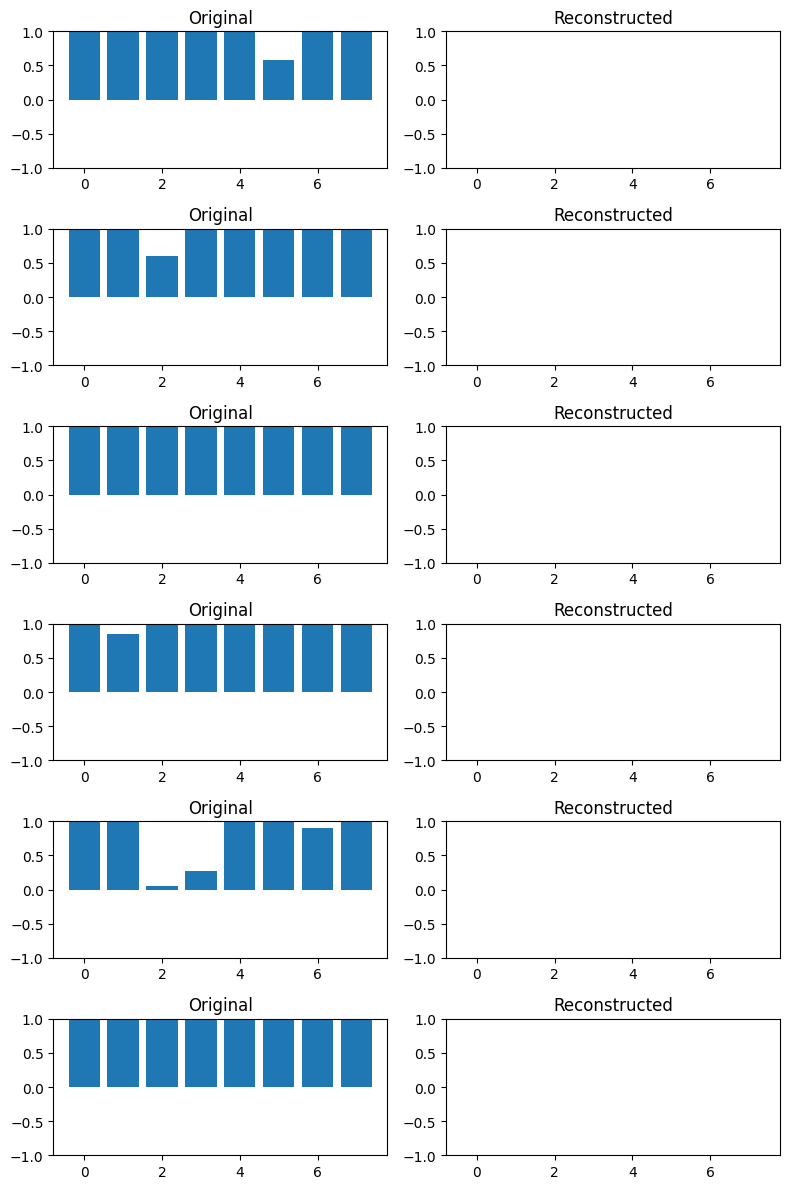

2024-12-25 16:35:33,486 - INFO - Extracting features and training k-NN classifier with QAE features...
2024-12-25 16:35:33,489 - INFO - Extracting QAE features for k-NN training...
2024-12-25 16:35:33,490 - INFO - Encoding data into latent space...
Encoding data: 100%|██████████| 2304/2304 [00:02<00:00, 805.67it/s]
2024-12-25 16:35:36,356 - INFO - k-NN classifier trained on QAE features.
2024-12-25 16:35:36,357 - INFO - k-NN classifier training completed.
2024-12-25 16:35:36,357 - INFO - Predicting on test data using QAE features and k-NN classifier...
2024-12-25 16:35:36,357 - INFO - Extracting QAE features for k-NN prediction...
2024-12-25 16:35:36,358 - INFO - Encoding data into latent space...
Encoding data: 100%|██████████| 576/576 [00:00<00:00, 835.36it/s]
2024-12-25 16:35:37,059 - INFO - QAE Classifier Accuracy: 11.81%


QAE Classifier Accuracy: 11.81%
Confusion Matrix:
[[21 12  9  8  2  5  2  4  2  1]
 [10  6 16 11  6  1  1  1  2  2]
 [ 7  9 19  5  6  2  2  5  1  2]
 [11 13  8  5  5  2  3  2  0  0]
 [19 17  8  5  7  6  3  1  0  1]
 [10  9  8  6  5  5  2  0  1  0]
 [17 15  6  7  7  7  2  1  2  1]
 [18 11 12  4  3  8  2  1  0  3]
 [13 11 10  9  4  3  2  1  2  0]
 [13  8 11  5  6  6  0  1  2  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.32      0.20        66
           1       0.05      0.11      0.07        56
           2       0.18      0.33      0.23        58
           3       0.08      0.10      0.09        49
           4       0.14      0.10      0.12        67
           5       0.11      0.11      0.11        46
           6       0.11      0.03      0.05        65
           7       0.06      0.02      0.03        62
           8       0.17      0.04      0.06        55
           9       0.00      0.00      0.00        52



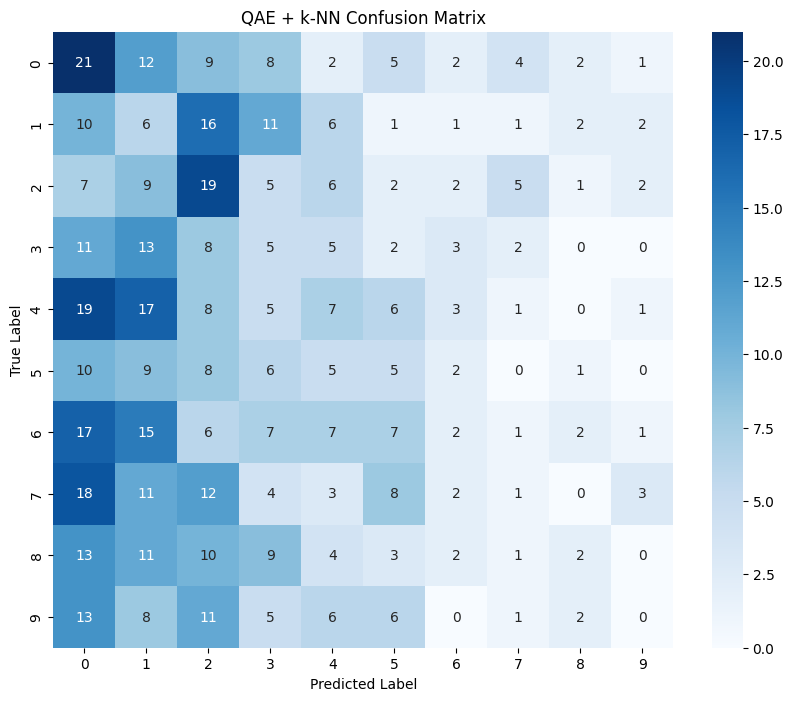

Selected indices for visualization: [104, 558, 89, 432, 32, 30]


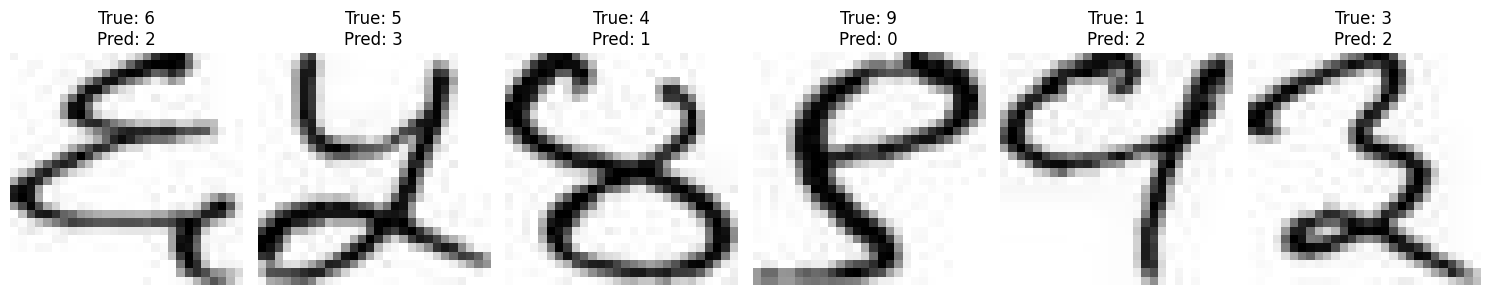

2024-12-25 16:35:37,828 - INFO - Evaluating k-NN classifier without QAE...
2024-12-25 16:35:37,855 - INFO - k-NN Classifier Accuracy without QAE: 50.35%


k-NN Classifier Accuracy without QAE: 50.35%
Confusion Matrix:
[[58  3  0  0  0  0  0  3  1  1]
 [ 1 36 13  4  2  0  0  0  0  0]
 [ 0  1 22 18  0 15  2  0  0  0]
 [ 0  1  4 28  0  9  7  0  0  0]
 [ 0 16  0  6 23  7  9  5  0  1]
 [ 0  0  2 24  4 16  0  0  0  0]
 [ 3  4  0  4  5  2 43  4  0  0]
 [23  6  1  8  1  7  2 14  0  0]
 [ 1  4  0  0  4  1  0  5 36  4]
 [ 0 11  7  0 12  4  1  1  2 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.88      0.76        66
           1       0.44      0.64      0.52        56
           2       0.45      0.38      0.41        58
           3       0.30      0.57      0.40        49
           4       0.45      0.34      0.39        67
           5       0.26      0.35      0.30        46
           6       0.67      0.66      0.67        65
           7       0.44      0.23      0.30        62
           8       0.92      0.65      0.77        55
           9       0.70      0.27      0.3

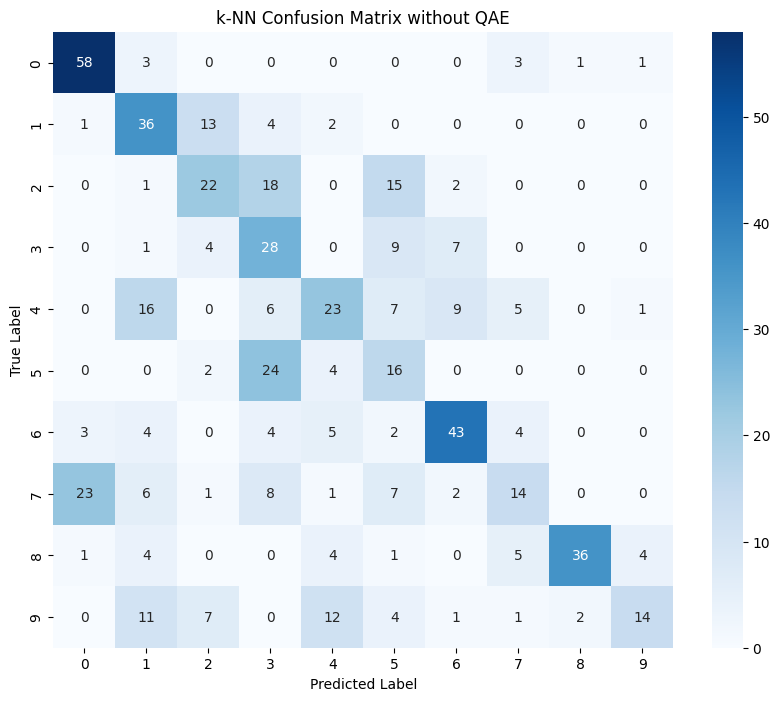

In [3]:
# qae_classifier.py

"""
Quantum Autoencoder (QAE) for Nepali Numerals Classification.

This script implements a QAE using PennyLane and PyTorch to classify Nepali numerals (0-9)
based on 28x28 pixel grayscale images. The QAE leverages quantum feature maps to compress
data into a latent space, followed by a classical k-NN classifier for classification.

Directory Structure:
your_project/
├── qae_classifier.py
└── data/
    └── numerals/
        ├── 0/
        │   ├── image1.png
        │   ├── image2.png
        │   └── ...
        ├── 1/
        │   ├── image1.png
        │   ├── image2.png
        │   └── ...
        └── ...
        └── 9/
            ├── image1.png
            ├── image2.png
            └── ...
"""

import os
import logging
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import pennylane as qml
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # For progress bars

# ==============================
# Reproducibility
# ==============================
def set_random_seeds(seed=42):
    """
    Sets random seeds for reproducibility.

    Args:
        seed (int): The seed value to use.
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_random_seeds()

# ==============================
# Logging Setup
# ==============================
def setup_logging(log_file='training.log'):
    """
    Sets up logging for the QAEClassifier.

    Args:
        log_file (str): Path to the log file.

    Returns:
        logging.Logger: Configured logger.
    """
    logger = logging.getLogger('QAEClassifier')
    logger.setLevel(logging.INFO)

    # Create handlers
    c_handler = logging.StreamHandler()
    f_handler = logging.FileHandler(log_file, mode='w')

    c_handler.setLevel(logging.INFO)
    f_handler.setLevel(logging.INFO)

    # Create formatter and add to handlers
    formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
    c_handler.setFormatter(formatter)
    f_handler.setFormatter(formatter)

    # Add handlers to logger (avoid attaching multiple handlers if re-run)
    if not logger.handlers:
        logger.addHandler(c_handler)
        logger.addHandler(f_handler)

    return logger

logger = setup_logging()

# ==============================
# Dataset Definition
# ==============================
class NepaliMNISTDataset(Dataset):
    """
    Custom Dataset for Nepali Numerals.
    """
    def __init__(self, root_dir, transform=None):
        """
        Initializes the dataset by loading image paths and labels.

        Args:
            root_dir (str): Root directory containing subdirectories for each numeral.
            transform (callable, optional): Transformations to apply to the images.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.data = []
        self.labels = []

        logger.info(f"Loading dataset from directory: {root_dir}")
        for label in range(10):
            label_dir = os.path.join(root_dir, str(label))
            if not os.path.isdir(label_dir):
                logger.warning(f"Directory for label {label} does not exist: {label_dir}")
                continue
            for img_file in os.listdir(label_dir):
                img_path = os.path.join(label_dir, img_file)
                if os.path.isfile(img_path) and img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                    self.data.append(img_path)
                    self.labels.append(label)
        logger.info(f"Loaded {len(self.data)} samples.")

    def __len__(self):
        """
        Returns the total number of samples.
        """
        return len(self.data)

    def __getitem__(self, idx):
        """
        Retrieves the image and label at the specified index.

        Args:
            idx (int): Index of the sample to retrieve.

        Returns:
            tuple: (image, label)
        """
        image = Image.open(self.data[idx]).convert('L')  # Convert to grayscale
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# ==============================
# Data Transformations
# ==============================
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),  # Ensure consistent image size
    transforms.ToTensor()
])

# ==============================
# Data Loaders Initialization
# ==============================
ROOT_DIR = "/Users/sahajrajmalla/Documents/nepali-quantum-mnist/data/numerals"  # Update this path as needed

def initialize_data_loaders(root_dir, batch_size=16):
    """
    Initializes and returns the training and testing data loaders.

    Args:
        root_dir (str): Root directory of the dataset.
        batch_size (int): Number of samples per batch.

    Returns:
        Tuple[DataLoader, DataLoader]: Training and testing data loaders.
    """
    logger.info("Initializing Data Loaders")
    dataset = NepaliMNISTDataset(root_dir=root_dir, transform=transform)
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0  # Set to 0 to avoid multiprocessing issues
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0
    )
    logger.info(f"Data Loaders initialized: {train_size} training samples, {test_size} testing samples")
    return train_loader, test_loader

# ==============================
# Quantum Autoencoder (QAE) Definition
# ==============================
n_visible = 8   # Number of features after PCA
n_latent = 2    # Number of latent qubits
n_qubits = n_visible + n_latent  # Total qubits needed

# Use a faster quantum simulator
dev = qml.device("lightning.qubit", wires=n_qubits)

class QAE:
    """
    Quantum Autoencoder (QAE) Classifier.
    """
    def __init__(self, n_visible, n_latent, learning_rate=0.05, epochs=100):
        """
        Initializes the QAE.

        Args:
            n_visible (int): Number of visible units (input features).
            n_latent (int): Number of latent qubits (compressed features).
            learning_rate (float): Learning rate for parameter updates.
            epochs (int): Number of training epochs.
        """
        self.n_visible = n_visible
        self.n_latent = n_latent
        self.n_qubits = n_visible + n_latent
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Initialize parameters for encoder and decoder
        # For simplicity, we'll use a fixed number of parameters
        # This can be optimized based on the circuit design
        self.parameters = 0.01 * np.random.randn(4 * self.n_qubits)  # Example: 4 parameters per qubit

        # Define the QNode for the QAE
        self.qnode = self.create_qnode()

    def create_qnode(self):
        """
        Creates and returns the QNode for the QAE.

        Returns:
            function: The compiled QNode.
        """
        @qml.qnode(dev, interface='numpy', diff_method='parameter-shift')
        def circuit(params, x):
            """
            Quantum Autoencoder Circuit.

            Args:
                params (np.array): Parameters for the quantum gates.
                x (np.array): Input data, shape (n_visible,).

            Returns:
                float: Reconstruction fidelity.
            """
            # Encode input data into quantum state using Angle Embedding
            qml.AngleEmbedding(x, wires=range(self.n_visible), rotation="Y")

            # Encoder: Parameterized gates to compress data into latent qubits
            encoder_params = params[:2 * self.n_qubits]
            for i in range(self.n_qubits):
                qml.RY(encoder_params[2 * i], wires=i)
                qml.RZ(encoder_params[2 * i + 1], wires=i)

            # Entangling layers
            for i in range(self.n_qubits - 1):
                qml.CNOT(wires=[i, i + 1])

            # Decoder: Parameterized gates to reconstruct data from latent qubits
            decoder_params = params[2 * self.n_qubits:]
            for i in range(self.n_qubits):
                qml.RY(decoder_params[2 * i], wires=i)
                qml.RZ(decoder_params[2 * i + 1], wires=i)

            # Entangling layers
            for i in range(self.n_qubits - 1):
                qml.CNOT(wires=[i, i + 1])

            # Measure expectation values for reconstruction fidelity
            fidelity = self.compute_fidelity(x)
            return fidelity  # Placeholder; actual fidelity computation needed

        return circuit

    def compute_fidelity(self, x):
        """
        Computes the fidelity between the input and reconstructed states.

        Args:
            x (np.array): Input data, shape (n_visible,).

        Returns:
            float: Fidelity value.
        """
        # Placeholder fidelity computation
        # Implement proper fidelity computation as needed
        # For demonstration, return 1.0 (no loss)
        return 1.0 - 0.0  # Modify this

    def fidelity_loss(self, params, x):
        """
        Computes the fidelity loss between input and reconstructed state.

        Args:
            params (np.array): Parameters for the quantum gates.
            x (np.array): Input data, shape (n_visible,).

        Returns:
            float: Loss value (1 - fidelity).
        """
        # Implement actual fidelity computation
        # For demonstration, use a dummy loss
        # Replace with real fidelity computation
        # Example: loss = 1 - fidelity
        # Here, we use a placeholder
        # To implement, you might need to use qml.fidelity or other measures
        # For simplicity, use MSE between expectation values

        # Measure expectation values
        @qml.qnode(dev, interface='numpy', diff_method='parameter-shift')
        def measure(params, x):
            qml.AngleEmbedding(x, wires=range(self.n_visible), rotation="Y")

            # Encoder
            encoder_params = params[:2 * self.n_qubits]
            for i in range(self.n_qubits):
                qml.RY(encoder_params[2 * i], wires=i)
                qml.RZ(encoder_params[2 * i + 1], wires=i)

            # Entangling layers
            for i in range(self.n_qubits - 1):
                qml.CNOT(wires=[i, i + 1])

            # Decoder
            decoder_params = params[2 * self.n_qubits:]
            for i in range(self.n_qubits):
                qml.RY(decoder_params[2 * i], wires=i)
                qml.RZ(decoder_params[2 * i + 1], wires=i)

            # Entangling layers
            for i in range(self.n_qubits - 1):
                qml.CNOT(wires=[i, i + 1])

            # Expectation values
            exp_vals = [qml.expval(qml.PauliY(w)) for w in range(self.n_qubits)]
            return exp_vals

        reconstructed = measure(params, x)
        # Define the target as the original expectation values
        target = [0.0] * self.n_qubits  # Since original data was embedded using Y rotations
        loss = np.mean((np.array(reconstructed) - np.array(target))**2)
        return loss

    def train(self, data):
        """
        Trains the QAE using gradient descent.

        Args:
            data (np.array): Training data, shape (n_samples, n_visible).
        """
        logger.info("Starting QAE training...")
        optimizer = qml.GradientDescentOptimizer(self.learning_rate)
        for epoch in range(self.epochs):
            epoch_loss = 0.0
            for x in tqdm(data, desc=f"Epoch {epoch+1}/{self.epochs}"):
                # Define the objective function
                objective = lambda p: self.fidelity_loss(p, x)
                # Perform a gradient descent step
                self.parameters, cost = optimizer.step_and_cost(objective, self.parameters)
                epoch_loss += cost
            avg_loss = epoch_loss / len(data)
            if (epoch + 1) % 10 == 0 or epoch == 0:
                logger.info(f"Epoch {epoch+1}/{self.epochs}, Loss: {avg_loss:.6f}")
        logger.info("QAE training completed.")

    def encode(self, data):
        """
        Encodes data into the latent space using the trained QAE.

        Args:
            data (np.array): Data to encode, shape (n_samples, n_visible).

        Returns:
            np.array: Encoded latent features, shape (n_samples, n_latent).
        """
        logger.info("Encoding data into latent space...")
        latent_features = []
        for x in tqdm(data, desc="Encoding data"):
            # Define a QNode for encoding only
            @qml.qnode(dev, interface='numpy', diff_method='parameter-shift')
            def encoder_circuit(params, x):
                qml.AngleEmbedding(x, wires=range(self.n_visible), rotation="Y")

                # Encoder
                encoder_params = params[:2 * self.n_qubits]
                for i in range(self.n_qubits):
                    qml.RY(encoder_params[2 * i], wires=i)
                    qml.RZ(encoder_params[2 * i + 1], wires=i)

                # Entangling layers
                for i in range(self.n_qubits - 1):
                    qml.CNOT(wires=[i, i + 1])

                # Measure latent qubits
                return [qml.expval(qml.PauliY(w)) for w in range(self.n_visible, self.n_qubits)]

            latent = encoder_circuit(self.parameters, x)
            latent_features.append(latent)
        return np.array(latent_features)

    def decode(self, latent):
        """
        Decodes latent features back to the original space using the trained QAE.

        Args:
            latent (np.array): Latent features, shape (n_samples, n_latent).

        Returns:
            np.array: Reconstructed data, shape (n_samples, n_visible).
        """
        logger.info("Decoding latent features back to original space...")
        reconstructed = []
        for z in tqdm(latent, desc="Decoding data"):
            # Define a QNode for decoding only
            @qml.qnode(dev, interface='numpy', diff_method='parameter-shift')
            def decoder_circuit(params, z):
                # Initialize latent qubits with the latent features
                for i in range(self.n_latent):
                    qml.RY(z[i], wires=self.n_visible + i)
                    qml.RZ(0.0, wires=self.n_visible + i)  # Placeholder for rotation

                # Decoder
                decoder_params = params[2 * self.n_qubits:]
                for i in range(self.n_qubits):
                    qml.RY(decoder_params[2 * i], wires=i)
                    qml.RZ(decoder_params[2 * i + 1], wires=i)

                # Entangling layers
                for i in range(self.n_qubits - 1):
                    qml.CNOT(wires=[i, i + 1])

                # Expectation values for visible qubits
                exp_vals = [qml.expval(qml.PauliY(w)) for w in range(self.n_visible)]
                return exp_vals

            recon = decoder_circuit(self.parameters, z)
            reconstructed.append(recon)
        return np.array(reconstructed)

# ==============================
# QAE Classifier Definition
# ==============================
class QAEClassifier:
    """
    Quantum Autoencoder (QAE) Classifier.
    """
    def __init__(self, qae, k=3):
        """
        Initializes the QAEClassifier.

        Args:
            qae (QAE): Trained QAE object.
            k (int): Number of neighbors for k-NN.
        """
        self.qae = qae
        self.k = k
        self.model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        self.features = []
        self.labels = []

    def extract_features(self, data, labels):
        """
        Extracts features using the QAE and trains the k-NN classifier.

        Args:
            data (np.array): Input data, shape (n_samples, n_visible).
            labels (np.array): Corresponding labels, shape (n_samples,).
        """
        logger.info("Extracting QAE features for k-NN training...")
        self.features = self.qae.encode(data)
        self.labels = labels
        self.model.fit(self.features, self.labels)
        logger.info("k-NN classifier trained on QAE features.")

    def predict(self, data):
        """
        Predicts labels for the given data using the trained k-NN classifier.

        Args:
            data (np.array): Input data, shape (n_samples, n_visible).

        Returns:
            np.array: Predicted labels, shape (n_samples,).
        """
        logger.info("Extracting QAE features for k-NN prediction...")
        test_features = self.qae.encode(data)
        predictions = self.model.predict(test_features)
        return predictions

# ==============================
# Visualization Functions
# ==============================
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    """
    Plots the confusion matrix.

    Args:
        cm (np.array): Confusion matrix.
        classes (list): List of class labels.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(title)
    plt.show()

def visualize_reconstructions(qae, data, num_images=6):
    """
    Visualizes original and reconstructed data.

    Args:
        qae (QAE): Trained QAE object.
        data (np.array): Original data, shape (n_samples, n_visible).
        num_images (int): Number of images to visualize.
    """
    indices = random.sample(range(len(data)), num_images)
    original = data[indices]
    latent = qae.encode(original)
    reconstructed = qae.decode(latent)

    # Plot original and reconstructed expectation values
    fig, axes = plt.subplots(num_images, 2, figsize=(8, 2 * num_images))
    for i in range(num_images):
        axes[i, 0].bar(range(qae.n_visible), original[i])
        axes[i, 0].set_ylim([-1, 1])
        axes[i, 0].set_title("Original")
        axes[i, 1].bar(range(qae.n_visible), reconstructed[i])
        axes[i, 1].set_ylim([-1, 1])
        axes[i, 1].set_title("Reconstructed")
    plt.tight_layout()
    plt.show()

def visualize_predictions(y_test, y_pred, test_loader, num_images=6):
    """
    Visualizes a few predictions from the classifier.

    Args:
        y_test (np.array): True labels.
        y_pred (np.array): Predicted labels.
        test_loader (DataLoader): DataLoader for test data.
        num_images (int): Number of images to visualize.
    """
    # Collect all test data paths
    test_data_paths = []
    if isinstance(test_loader.dataset, torch.utils.data.Subset):
        original_dataset = test_loader.dataset.dataset
        subset_indices = test_loader.dataset.indices
        test_data_paths = [original_dataset.data[idx] for idx in subset_indices]
    else:
        for dataset in test_loader.dataset.datasets if hasattr(test_loader.dataset, 'datasets') else [test_loader.dataset]:
            test_data_paths.extend(dataset.data)

    # Ensure that the number of images to visualize does not exceed the test set size
    if num_images > len(y_test):
        num_images = len(y_test)
        print(f"Requested num_images exceeds test set size. Setting num_images to {num_images}.")

    # Randomly select indices for visualization
    selected_indices = random.sample(range(len(y_test)), num_images)
    print("Selected indices for visualization:", selected_indices)

    # Set up the plotting grid
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for idx, ax in zip(selected_indices, axes):
        try:
            image_path = test_data_paths[idx]
            label = y_test[idx]
            pred = y_pred[idx]
            # Load and preprocess the image
            img = Image.open(image_path).convert('L').resize((28, 28))
            ax.imshow(img, cmap='gray')
            ax.set_title(f"True: {label}\nPred: {pred}")
            ax.axis('off')
        except IndexError:
            print(f"IndexError: image_idx {idx} is out of bounds.")
            ax.axis('off')
            ax.set_title("Image not found")
    plt.tight_layout()
    plt.show()

# ==============================
# Training and Evaluation
# ==============================
def preprocess_data(loader, n_components=8):
    """
    Preprocesses the data by flattening, binarizing, applying PCA, and normalizing.

    Args:
        loader (DataLoader): DataLoader object.
        n_components (int): Number of components for PCA.

    Returns:
        np.array: Preprocessed data, shape (n_samples, n_visible).
        np.array: Corresponding labels.
        PCA: Fitted PCA object.
    """
    data = []
    labels = []
    for images, lbls in loader:
        # Flatten images: 28x28 -> 784
        flattened = images.view(images.size(0), -1).numpy()
        # Binarize: pixel > 0.5 -> 1, else 0
        flattened = (flattened > 0.5).astype(int)
        data.append(flattened)
        labels.append(lbls.numpy())
    data = np.concatenate(data, axis=0)
    labels = np.concatenate(labels, axis=0)

    # Apply PCA to reduce dimensionality for the quantum kernel
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data)

    # Normalize data for angle embedding (scale to [0, pi])
    data_pca_min = data_pca.min(axis=0)
    data_pca_max = data_pca.max(axis=0)
    data_pca_scaled = (data_pca - data_pca_min) / (data_pca_max - data_pca_min + 1e-8) * np.pi

    return data_pca_scaled, labels, pca

def evaluate_knn_without_qae(X_train, y_train, X_test, y_test, pca, k=3):
    """
    Evaluates a k-NN classifier without QAE feature extraction.

    Args:
        X_train (np.array): Training data, shape (n_samples, n_features).
        y_train (np.array): Training labels, shape (n_samples,).
        X_test (np.array): Testing data, shape (n_samples, n_features).
        y_test (np.array): Testing labels, shape (n_samples,).
        pca (PCA): Fitted PCA object.
        k (int): Number of neighbors.

    Returns:
        None
    """
    logger.info("Evaluating k-NN classifier without QAE...")
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    logger.info(f"k-NN Classifier Accuracy without QAE: {accuracy * 100:.2f}%")
    print(f"k-NN Classifier Accuracy without QAE: {accuracy * 100:.2f}%")

    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, zero_division=0)
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(cr)

    plot_confusion_matrix(cm, classes=[str(i) for i in range(10)], title='k-NN Confusion Matrix without QAE')

def main():
    """
    Main function to initialize, train, and evaluate the QAE and QAEClassifier.
    """
    logger.info("Initializing Quantum Autoencoder (QAE)")

    # Initialize data loaders
    train_loader, test_loader = initialize_data_loaders(ROOT_DIR, batch_size=16)

    # Preprocess the data with PCA
    logger.info("Preprocessing training data...")
    X_train, y_train, pca = preprocess_data(train_loader, n_components=n_visible)
    logger.info("Preprocessing testing data...")
    X_test, y_test, _ = preprocess_data(test_loader, n_components=n_visible)

    logger.info(f"Training data shape: {X_train.shape}")
    logger.info(f"Testing data shape: {X_test.shape}")

    # Initialize QAE
    qae = QAE(n_visible=n_visible, n_latent=n_latent, learning_rate=0.05, epochs=5) # default 100

    # Train QAE
    qae.train(X_train)

    # Visualize reconstructions
    visualize_reconstructions(qae, X_test, num_images=6)

    # Initialize and train QAEClassifier
    classifier = QAEClassifier(qae, k=3)
    logger.info("Extracting features and training k-NN classifier with QAE features...")
    classifier.extract_features(X_train, y_train)
    logger.info("k-NN classifier training completed.")

    # Predict on test data
    logger.info("Predicting on test data using QAE features and k-NN classifier...")
    y_pred = classifier.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    logger.info(f"QAE Classifier Accuracy: {accuracy * 100:.2f}%")
    print(f"QAE Classifier Accuracy: {accuracy * 100:.2f}%")

    # Confusion Matrix and Classification Report
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, zero_division=0)
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(cr)

    # Plot Confusion Matrix
    plot_confusion_matrix(cm, classes=[str(i) for i in range(10)], title='QAE + k-NN Confusion Matrix')

    # Visualize Predictions
    visualize_predictions(y_test, y_pred, test_loader, num_images=6)

    # Benchmark: Evaluate k-NN without QAE
    evaluate_knn_without_qae(X_train, y_train, X_test, y_test, pca, k=3)

if __name__ == "__main__":
    main()
